<a href="https://colab.research.google.com/github/srijit43/Summer_Camp_CPP24/blob/main/Malware_dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading in and Observing the data

In [2]:
import sys
import os
import re
import numpy as np
import scipy as sp
from math import log
import math
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
root = '/content/drive/MyDrive/Malware trial'

Processing 0ACDbR5M3ZhBJajygTuf.bytes


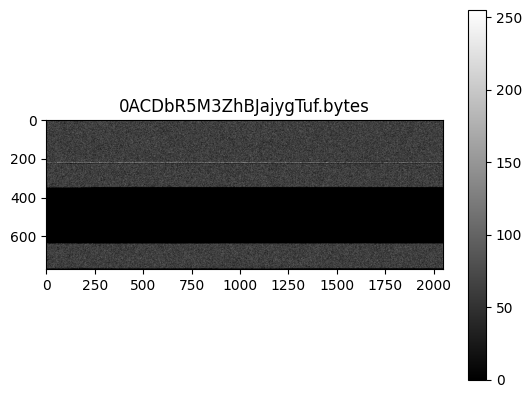

Processing 0A32eTdBKayjCWhZqDOQ.bytes


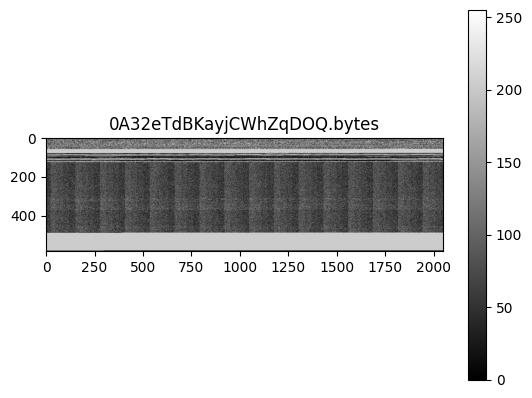

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

# Set up directory to place data set
root = '/content/drive/MyDrive/Malware trial'  # Change this to your actual path

# Function to convert data arrays to PNG images and save them
def convertAndSave(array, name):
    print('Processing ' + name)
    if array.shape[1] != 16:  # Ensure the array has 16 columns
        assert False

    b = int(math.sqrt(array.shape[0] * 16))
    b = 2 ** math.ceil(math.log(b, 2))
    a = int(array.shape[0] * 16 / b)
    array = array[:a * b // 16, :]
    array = array.reshape((a, b))

    # Ensure array is of type uint8
    array = array.astype(np.uint8)

    # Plot the array
    plt.figure()
    plt.imshow(array, cmap='gray')
    plt.title(name)
    plt.colorbar()
    plt.savefig(os.path.join(root, name + '_plot.png'))
    plt.show()

    # Save the image
    im = Image.fromarray(array)
    im.save(os.path.join(root, name + '.png'), "PNG")
    plt.close()

# Get list of files
files = os.listdir(root)

# Process Files
for counter, name in enumerate(files):
    if '.bytes' not in name:
        continue

    # Open File in binary mode
    with open(os.path.join(root, name), 'rb') as f:
        array = []
        for line in f:
            line = line.decode(errors='ignore')  # Decode with ignoring errors
            xx = line.split()
            if len(xx) != 17:
                continue

            try:
                # Append line to array
                array.append([int(i, 16) if i != '??' else 0 for i in xx[1:]])
            except ValueError:
                # Skip lines with invalid hexadecimal values
                continue

        # Convert list to numpy array
        if array:
            array = np.array(array)

            # Convert Files in Array
            convertAndSave(array, name)

            # Clear array
            del array


#Splitting the Data

In [5]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [10]:
directory = '/content/drive/MyDrive/Malware_trial'

In [11]:
target_size = (64,64)
batch_size = 10_000
seed = 42

In [12]:
generator = ImageDataGenerator(rescale = 1.0/ 255.0)

In [13]:
flow = generator.flow_from_directory(
    directory = directory,
    target_size = target_size,
    batch_size = batch_size,
    shuffle = True,
    seed = seed
)

Found 3187 images belonging to 3 classes.


In [14]:
X, y = next(flow)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2390, 64, 64, 3), (797, 64, 64, 3), (2390, 3), (797, 3))

In [18]:
y_train_new = np.argmax(y_train, axis = 1)
y_train.shape

(2390, 3)

#CNN Model

In [20]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [21]:
num_classes = 3
epochs = 10
input_shape = (64,64,3)

In [22]:
def malware_detection_model():
  model = Sequential([
      Conv2D(30,3, activation='relu', input_shape = input_shape),
      MaxPooling2D(),
      Conv2D(15,3, activation='relu', input_shape = input_shape),
      MaxPooling2D(),
      Dropout(0.25),
      Flatten(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(50, activation = 'relu'),
      Dense(num_classes, activation = 'softmax')


  ])

  model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [23]:
model = malware_detection_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 15)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 15)        0         
                                                                 
 flatten (Flatten)           (None, 2940)              0